# 燃費の予想
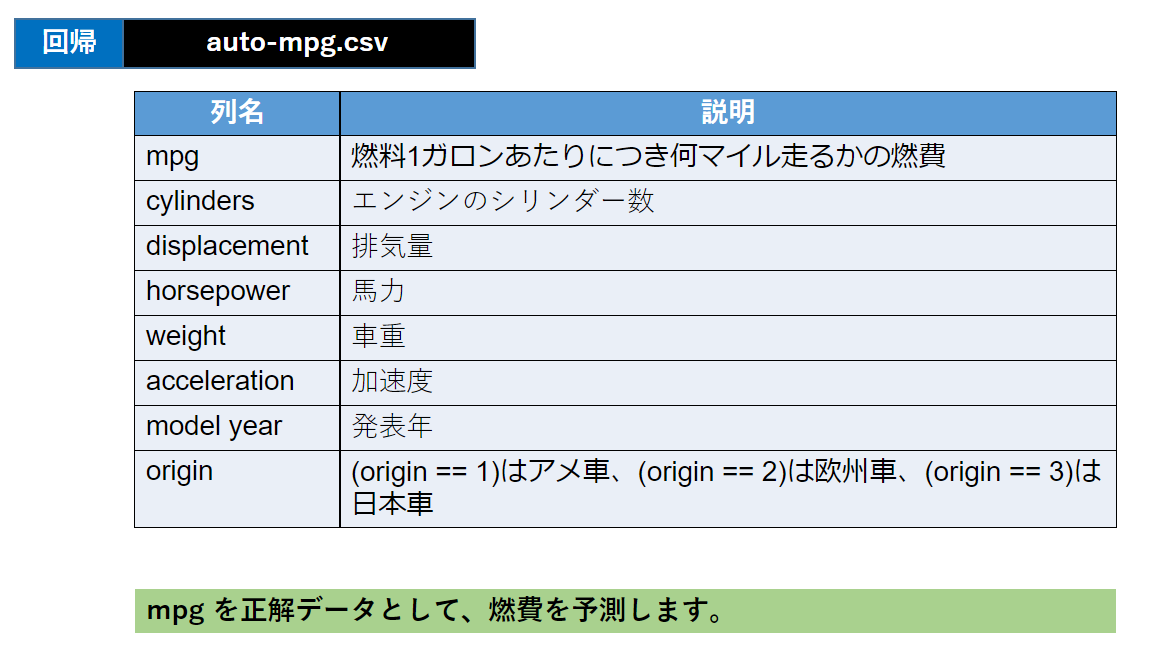

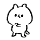
前処理

In [128]:
import numpy as np
import pandas as pd
import sklearn

In [129]:
# データの読み込み
df = pd.read_csv('auto_mgp.csv')

# 油データの様子を確認
df.head()

,Unnamed: 0,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,0,18.0,8,307.0,130.0,3504,12.0,70,1
1,1,15.0,8,350.0,165.0,3693,11.5,70,1
2,2,18.0,8,318.0,150.0,3436,11.0,70,1
3,3,16.0,8,304.0,150.0,3433,12.0,70,1
4,4,17.0,8,302.0,140.0,3449,10.5,70,1


In [130]:
# 読み込んだデータの行数、列数を表示する
print('読み込んだデータの行数、列数：', df.shape)

# データ内の欠損値の数を表示する
print('読み込んだデータ全体の欠損値数：', df.isnull().sum().sum())

読み込んだデータの行数、列数： (398, 9)
読み込んだデータ全体の欠損値数： 6


In [131]:
# 欠損値のある列を確認
df.isnull().any(axis=0)

Unnamed: 0      False
MPG             False
Cylinders       False
Displacement    False
Horsepower       True
Weight          False
Acceleration    False
Model Year      False
Origin          False
dtype: bool

In [132]:
index = df[df["Horsepower"].isnull()].index
index

Int64Index([32, 126, 330, 336, 354, 374], dtype='int64')

In [133]:
# HorsepowerがNANの行をすべて取ってきて観察
hpdf = df.loc[index,:]
hpdf

,Unnamed: 0,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
32,32,25.0,4,98.0,NaN,2046,19.0,71,1
126,126,21.0,6,200.0,NaN,2875,17.0,74,1
330,330,40.9,4,85.0,NaN,1835,17.3,80,2
336,336,23.6,4,140.0,NaN,2905,14.3,80,1
354,354,34.5,4,100.0,NaN,2320,15.8,81,2
374,374,23.0,4,151.0,NaN,3035,20.5,82,1


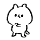
欠損値の馬力列を予測するモデルを作成しその値で欠損値を補完してみる

In [134]:
dfip= df.copy()
dfip = dfip.dropna(how='any', axis=0)
dfip.head()

,Unnamed: 0,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,0,18.0,8,307.0,130.0,3504,12.0,70,1
1,1,15.0,8,350.0,165.0,3693,11.5,70,1
2,2,18.0,8,318.0,150.0,3436,11.0,70,1
3,3,16.0,8,304.0,150.0,3433,12.0,70,1
4,4,17.0,8,302.0,140.0,3449,10.5,70,1


In [135]:
# 念のため欠損値を確認
dfip.isnull().sum().sum()

0

In [136]:
# データ分割
# 特徴量
xip = dfip.drop(['Horsepower', 'Unnamed: 0'],axis=1)
xip.head()

,MPG,Cylinders,Displacement,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,3504,12.0,70,1
1,15.0,8,350.0,3693,11.5,70,1
2,18.0,8,318.0,3436,11.0,70,1
3,16.0,8,304.0,3433,12.0,70,1
4,17.0,8,302.0,3449,10.5,70,1


In [137]:
# 正解データ
tip = dfip['Horsepower']
tip.head()

0    130.0
1    165.0
2    150.0
3    150.0
4    140.0
Name: Horsepower, dtype: float64

In [138]:
import pandas as pd
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(xip, tip, test_size=0.3, random_state=2)

In [139]:
# 重回帰でモデル作成
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [140]:
# モデルのスコアを観察
model.score(x_train,y_train)

0.9168516397648094

In [141]:
# よさげなので、modelを使って欠損値の'Horsepower'データを予測
# model.predict(hpdf.drop(['Horsepower', 'Unnamed: 0'],axis=1))
pred=model.predict(hpdf.drop(['Horsepower', 'Unnamed: 0'],axis=1))
pred

array([58.15780298, 93.43779787, 55.74177825, 97.39579658, 75.16196179,
       72.38876526])

In [142]:
hpdf

,Unnamed: 0,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
32,32,25.0,4,98.0,NaN,2046,19.0,71,1
126,126,21.0,6,200.0,NaN,2875,17.0,74,1
330,330,40.9,4,85.0,NaN,1835,17.3,80,2
336,336,23.6,4,140.0,NaN,2905,14.3,80,1
354,354,34.5,4,100.0,NaN,2320,15.8,81,2
374,374,23.0,4,151.0,NaN,3035,20.5,82,1


In [143]:
# 欠損値を代入していくことにする
df_fillna = df.copy()

In [144]:
df_fillna.loc[df_fillna['Unnamed: 0'] == 32, 'Horsepower'] = pred[0]
df_fillna.loc[df_fillna['Unnamed: 0'] == 126, 'Horsepower'] = pred[1]
df_fillna.loc[df_fillna['Unnamed: 0'] == 330, 'Horsepower'] = pred[2]
df_fillna.loc[df_fillna['Unnamed: 0'] == 336, 'Horsepower'] = pred[3]
df_fillna.loc[df_fillna['Unnamed: 0'] == 354, 'Horsepower'] = pred[4]
df_fillna.loc[df_fillna['Unnamed: 0'] == 374, 'Horsepower'] = pred[5]
# 補完が完了しているか確認
df_fillna.loc[index,:]

,Unnamed: 0,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
32,32,25.0,4,98.0,58.157803,2046,19.0,71,1
126,126,21.0,6,200.0,93.437798,2875,17.0,74,1
330,330,40.9,4,85.0,55.741778,1835,17.3,80,2
336,336,23.6,4,140.0,97.395797,2905,14.3,80,1
354,354,34.5,4,100.0,75.161962,2320,15.8,81,2
374,374,23.0,4,151.0,72.388765,3035,20.5,82,1


In [145]:
df_fillna.isnull().sum().sum()

0

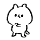
欠損値の補完が完了。外れ値の確認

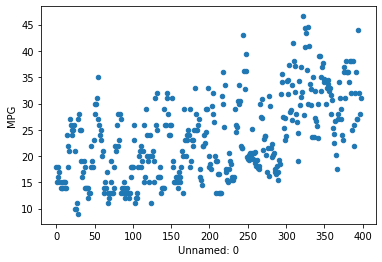

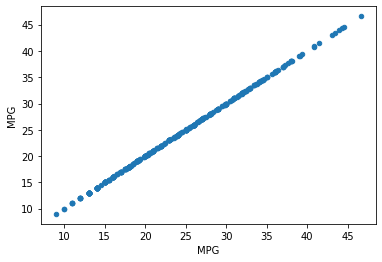

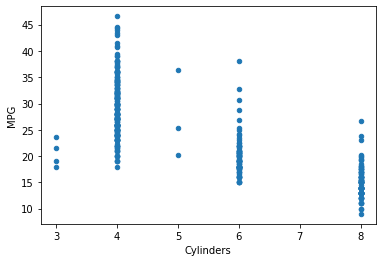

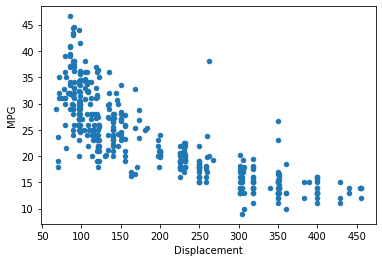

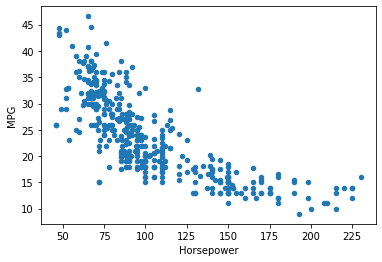

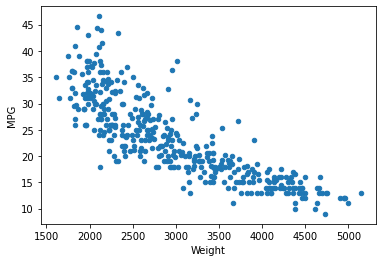

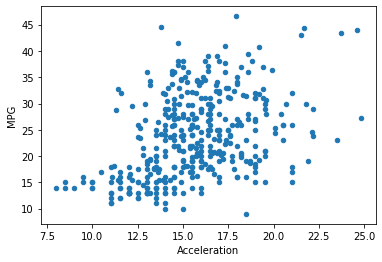

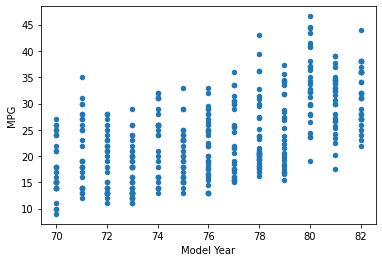

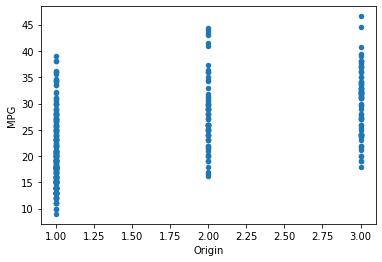

In [146]:
%matplotlib inline
for name in df_fillna.columns:
    df_fillna.plot(kind='scatter',x=name, y='MPG')

この外れ値のみ顕著に値がずれているため削除する。

他は学習データのゆらぎとしてデータに含めたままモデルの作成を行う

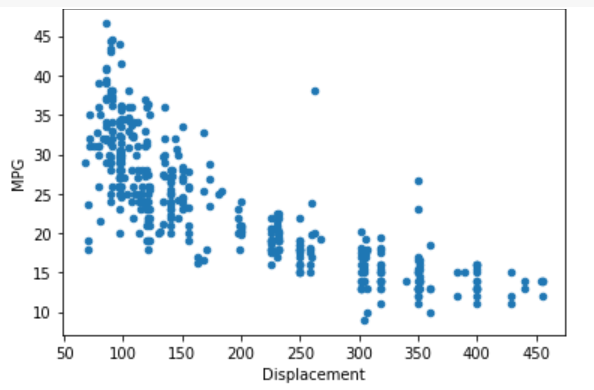

In [147]:
no = df_fillna[(df_fillna['Displacement']>250) & (df_fillna['MPG'] > 35)].index
no

Int64Index([387], dtype='int64')

In [148]:
# 外れ値のデータを一行削除
dfd = df_fillna.drop(no,axis=0)

In [149]:
# 外れ値のデータが存在しないか確認
dfd[(dfd['Displacement']>250) & (dfd['MPG'] > 35)]

,Unnamed: 0,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin


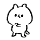
外れ値の削除が完了。特徴量の絞り込みをおこなう

In [150]:
corrdata = dfd.corr()
corrdata

,Unnamed: 0,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
Unnamed: 0,1.000000,0.581960,-0.365655,-0.391238,-0.420205,-0.320175,0.286556,0.996779,0.203479
MPG,0.581960,1.000000,-0.780389,-0.811248,-0.778468,-0.835622,0.419826,0.576093,0.569634
Cylinders,-0.365655,-0.780389,1.000000,0.950832,0.843980,0.896094,-0.506078,-0.351268,-0.562401
Displacement,-0.391238,-0.811248,0.950832,1.000000,0.899137,0.933250,-0.545030,-0.374301,-0.608948
Horsepower,-0.420205,-0.778468,0.843980,0.899137,1.000000,0.865154,-0.690122,-0.414278,-0.450673
Weight,-0.320175,-0.835622,0.896094,0.933250,0.865154,1.000000,-0.417670,-0.307802,-0.581306
Acceleration,0.286556,0.419826,-0.506078,-0.545030,-0.690122,-0.417670,1.000000,0.287063,0.207013
Model Year,0.996779,0.576093,-0.351268,-0.374301,-0.414278,-0.307802,0.287063,1.000000,0.184314
Origin,0.203479,0.569634,-0.562401,-0.608948,-0.450673,-0.581306,0.207013,0.184314,1.000000


In [151]:
# わかりづらいのでもう少しわかりやすく表示
corr_y = pd.DataFrame({"列":dfd.columns,"相関":corrdata["MPG"]},index=None)
corr_y = corr_y.reset_index(drop=True)
corr_y.style.background_gradient()

,列,相関
0,Unnamed: 0,0.581960
1,MPG,1.000000
2,Cylinders,-0.780389
3,Displacement,-0.811248
4,Horsepower,-0.778468
5,Weight,-0.835622
6,Acceleration,0.419826
7,Model Year,0.576093
8,Origin,0.569634


In [152]:
# Cylinders,Displacement,Horsepower,Weight,Model Year,Originの順に相関が高いことが判明
# Acceleration、Unnamed: 0はモデル作成時には削除する
dfd2 = dfd.drop(['Acceleration', 'Unnamed: 0'],axis=1)
dfd2

,MPG,Cylinders,Displacement,Horsepower,Weight,Model Year,Origin
0,18.0,8,307.0,130.0,3504,70,1
1,15.0,8,350.0,165.0,3693,70,1
2,18.0,8,318.0,150.0,3436,70,1
3,16.0,8,304.0,150.0,3433,70,1
4,17.0,8,302.0,140.0,3449,70,1
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,82,1
394,44.0,4,97.0,52.0,2130,82,2
395,32.0,4,135.0,84.0,2295,82,1
396,28.0,4,120.0,79.0,2625,82,1


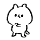
特徴量の絞り込みが完了。標準化を行う

In [153]:
# 特徴量
x = dfd2.iloc[:,1:]
x.head()

,Cylinders,Displacement,Horsepower,Weight,Model Year,Origin
0,8,307.0,130.0,3504,70,1
1,8,350.0,165.0,3693,70,1
2,8,318.0,150.0,3436,70,1
3,8,304.0,150.0,3433,70,1
4,8,302.0,140.0,3449,70,1


In [154]:
# 正解
t = dfd2.iloc[:,:1]
t.head()

,MPG
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [155]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, t, test_size=0.3, random_state=2)

In [156]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#x_trainを標準化
x_train_std = sc.fit_transform(x_train)
x_train_std

array([[-0.88586664, -0.73389921, -0.53832987, -0.82038699, -0.81774054,
        -0.65512694],
       [-0.88586664, -0.4093148 , -0.35545152, -0.45974179,  1.32170814,
        -0.65512694],
       [ 1.42363979,  1.53819168,  1.1598263 ,  1.07590876,  0.78684597,
        -0.65512694],
       ...,
       [ 1.42363979,  1.00358206,  1.1598263 ,  1.02006693, -1.08517162,
        -0.65512694],
       [ 0.26888658, -0.00835758, -0.27707508, -0.21194363, -1.62003379,
        -0.65512694],
       [-0.88586664, -0.56206041, -0.59058083, -0.43763773, -0.28287837,
        -0.65512694]])

In [157]:
#y_trainを標準化
y_train_std = sc.fit_transform(y_train)
y_train_std

array([[-0.54183089],
       [ 0.31761557],
       [-0.60502548],
       [ 0.64622745],
       [ 0.84845014],
       [-1.04738763],
       [-0.3396082 ],
       [ 1.05067284],
       [-0.73141467],
       [ 2.94651061],
       [ 1.03803392],
       [-0.92099845],
       [ 0.09011503],
       [ 0.05219828],
       [ 1.10122851],
       [-0.98419304],
       [-0.41544171],
       [ 0.84845014],
       [ 1.85956362],
       [-1.17377682],
       [-0.65558116],
       [-0.92099845],
       [-0.16266334],
       [-0.73141467],
       [-0.28905252],
       [-0.54183089],
       [ 1.99859172],
       [ 1.85956362],
       [ 0.21650422],
       [ 1.37928472],
       [-1.300166  ],
       [-1.42655519],
       [-1.300166  ],
       [-0.35224711],
       [ 1.12650635],
       [ 0.3428934 ],
       [ 0.91164473],
       [-1.04738763],
       [-0.41544171],
       [-1.17377682],
       [-0.66822008],
       [-0.39016387],
       [-0.16266334],
       [ 1.48039607],
       [-0.79460926],
       [-1

In [158]:
# 標準化したデータで学習
model2= LinearRegression()
model2.fit(x_train_std,y_train_std)

LinearRegression()

In [159]:
# 検証用データも標準化
x_val_std = sc.fit_transform(x_val)
x_val_std

array([[ 1.69659207e+00,  2.55170460e+00,  2.97603885e+00,
         2.31442079e+00, -8.02021797e-01, -8.66927850e-01],
       [-7.86225594e-01, -8.08322249e-01, -1.10248494e+00,
        -1.01674460e+00, -1.36484411e+00, -8.66927850e-01],
       [ 1.69659207e+00,  7.83269417e-01,  2.45619317e-01,
         1.47822271e+00,  3.23622830e-01, -8.66927850e-01],
       [-7.86225594e-01, -8.18146889e-01, -8.72552493e-01,
        -8.94102217e-01,  1.16785630e+00,  1.52459725e+00],
       [-7.86225594e-01, -7.39549770e-01, -6.90524524e-01,
        -8.38355679e-01,  1.44926746e+00,  3.28834702e-01],
       [ 1.69659207e+00,  1.76573341e+00,  2.97603885e+00,
         2.16576335e+00, -1.64625527e+00, -8.66927850e-01],
       [ 1.69659207e+00,  2.44363356e+00,  2.79401088e+00,
         2.18806197e+00, -1.08343295e+00, -8.66927850e-01],
       [-1.65521178e-01,  2.67721438e-02, -6.12512537e-01,
         8.21652364e-01,  8.86445144e-01,  3.28834702e-01],
       [ 1.69659207e+00,  1.66748701e+00,  1.155

In [160]:
y_val_std = sc.fit_transform(y_val)
y_val_std

array([[-1.46477766],
       [ 0.14499097],
       [-0.92818812],
       [ 1.32548796],
       [ 1.21817005],
       [-1.86721982],
       [-1.73307244],
       [ 0.19864992],
       [-1.19648289],
       [-1.1294092 ],
       [-0.65989335],
       [-0.25745119],
       [ 0.14499097],
       [ 0.68158051],
       [ 0.27913835],
       [ 1.21817005],
       [ 0.44011522],
       [ 1.36573218],
       [-0.32452488],
       [-0.79404073],
       [ 1.35231744],
       [-0.780626  ],
       [ 0.41328574],
       [ 0.54743312],
       [-1.46477766],
       [-0.79404073],
       [ 0.14499097],
       [ 0.01084358],
       [ 1.62061221],
       [ 2.02305437],
       [ 0.41328574],
       [ 1.7547596 ],
       [-0.39159858],
       [ 0.21206466],
       [-1.33063028],
       [ 0.33279731],
       [ 0.93646054],
       [ 0.94987528],
       [-2.00136721],
       [-0.84769969],
       [ 1.21817005],
       [ 0.01084358],
       [-0.79404073],
       [ 0.27913835],
       [ 0.68158051],
       [ 0

In [161]:
model2.score(x_val_std,y_val_std)

0.8099010638119014

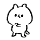
もう少しスコアを上げるために、多項式特徴量を試してみる

In [162]:
# どんなデータだったのかもう一度思い出す
dfd.head()

,Unnamed: 0,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,0,18.0,8,307.0,130.0,3504,12.0,70,1
1,1,15.0,8,350.0,165.0,3693,11.5,70,1
2,2,18.0,8,318.0,150.0,3436,11.0,70,1
3,3,16.0,8,304.0,150.0,3433,12.0,70,1
4,4,17.0,8,302.0,140.0,3449,10.5,70,1


In [163]:
# もう一度相関を確認
corrdata = dfd.corr()
corr_y = pd.DataFrame({"列":dfd.columns,"相関":corrdata["MPG"]},index=None)
corr_y = corr_y.reset_index(drop=True)
corr_y.style.background_gradient()

,列,相関
0,Unnamed: 0,0.581960
1,MPG,1.000000
2,Cylinders,-0.780389
3,Displacement,-0.811248
4,Horsepower,-0.778468
5,Weight,-0.835622
6,Acceleration,0.419826
7,Model Year,0.576093
8,Origin,0.569634


In [164]:
# Cylinders,Displacement,Horsepower,Weight,Model Year,Originの順に相関が高い
# Acceleration、Unnamed: 0はモデル作成時には削除する
dfd3 = dfd.drop(['Unnamed: 0'],axis=1)
dfd3.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [165]:
# Origin列をダミー変数化する。dropfirstは後からデータがわかりづらくなるので使わない
dfd4 = pd.get_dummies(dfd3['Origin'],prefix='Origin')
dfd4

,Origin_1,Origin_2,Origin_3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
393,1,0,0
394,0,1,0
395,1,0,0
396,1,0,0


In [166]:
# ダミー変数化したデータを結合
df_dm = pd.concat([dfd3,dfd4],axis=1)
df_dm.head(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Origin_1,Origin_2,Origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,1,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,1,0,0
5,15.0,8,429.0,198.0,4341,10.0,70,1,1,0,0
6,14.0,8,454.0,220.0,4354,9.0,70,1,1,0,0
7,14.0,8,440.0,215.0,4312,8.5,70,1,1,0,0
8,14.0,8,455.0,225.0,4425,10.0,70,1,1,0,0
9,15.0,8,390.0,190.0,3850,8.5,70,1,1,0,0


In [167]:
df_dm2 = df_dm.drop(['Origin'],axis=1)
df_dm2.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_1,Origin_2,Origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


In [168]:
# Acceleration,Model Year 列を二乗
df_dm2['Acceleration'] = df_dm2['Acceleration'] ** 2


In [170]:
df_dm2.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_1,Origin_2,Origin_3
0,18.0,8,307.0,130.0,3504,144.00,70,1,0,0
1,15.0,8,350.0,165.0,3693,132.25,70,1,0,0
2,18.0,8,318.0,150.0,3436,121.00,70,1,0,0
3,16.0,8,304.0,150.0,3433,144.00,70,1,0,0
4,17.0,8,302.0,140.0,3449,110.25,70,1,0,0


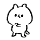
再度モデルを作成していく

In [172]:
# 特徴量
x = df_dm2.iloc[:,1:]
x.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_1,Origin_2,Origin_3
0,8,307.0,130.0,3504,144.00,70,1,0,0
1,8,350.0,165.0,3693,132.25,70,1,0,0
2,8,318.0,150.0,3436,121.00,70,1,0,0
3,8,304.0,150.0,3433,144.00,70,1,0,0
4,8,302.0,140.0,3449,110.25,70,1,0,0


In [173]:
# 正解
t = df_dm2.iloc[:,:1]
t.head()

,MPG
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [174]:
x_train, x_val, y_train, y_val = train_test_split(x, t, test_size=0.3, random_state=2)

In [185]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#x_trainを標準化
x_train_std2 = sc.fit_transform(x_train)
x_train_std2[0:5,]

array([[-0.88586664, -0.73389921, -0.53832987, -0.82038699,  1.0390561 ,
        -0.81774054,  0.70519309, -0.42867317, -0.46358632],
       [-0.88586664, -0.4093148 , -0.35545152, -0.45974179, -0.4410729 ,
         1.32170814,  0.70519309, -0.42867317, -0.46358632],
       [ 1.42363979,  1.53819168,  1.1598263 ,  1.07590876, -0.86199178,
         0.78684597,  0.70519309, -0.42867317, -0.46358632],
       [-0.88586664, -0.4570478 , -0.40770248, -0.40157321,  0.09264698,
         0.78684597,  0.70519309, -0.42867317, -0.46358632],
       [-0.88586664, -0.60979341, -0.56445535, -0.73313412, -0.89041149,
         1.32170814,  0.70519309, -0.42867317, -0.46358632]])

In [186]:
#y_trainを標準化
y_train_std2 = sc.fit_transform(y_train)
y_train_std2[0:5]

array([[-0.54183089],
       [ 0.31761557],
       [-0.60502548],
       [ 0.64622745],
       [ 0.84845014]])

In [187]:
# 標準化したデータで学習
model3= LinearRegression()
model3.fit(x_train_std2,y_train_std2)

LinearRegression()

In [188]:
# 検証用データも標準化
x_val_std2 = sc.fit_transform(x_val)
x_val_std2[0:5,]

array([[ 1.69659207,  2.5517046 ,  2.97603885,  2.31442079, -1.6241306 ,
        -0.8020218 ,  0.95118973, -0.53881591, -0.57735027],
       [-0.78622559, -0.80832225, -1.10248494, -1.0167446 ,  1.28144247,
        -1.36484411,  0.95118973, -0.53881591, -0.57735027],
       [ 1.69659207,  0.78326942,  0.24561932,  1.47822271,  1.28144247,
         0.32362283,  0.95118973, -0.53881591, -0.57735027],
       [-0.78622559, -0.81814689, -0.87255249, -0.89410222,  0.83349995,
         1.1678563 , -1.05131497, -0.53881591,  1.73205081],
       [-0.78622559, -0.73954977, -0.69052452, -0.83835568, -0.64785805,
         1.44926746, -1.05131497,  1.85592145, -0.57735027]])

In [189]:
y_val_std2 = sc.fit_transform(y_val)
y_val_std2[0:5]

array([[-1.46477766],
       [ 0.14499097],
       [-0.92818812],
       [ 1.32548796],
       [ 1.21817005]])

In [190]:
model3.score(x_val_std2,y_val_std2)

-2.454185007843117e+24

とんでもなく精度が下がってしまった。

①特徴量エンジニアリングとして相関が低めのデータを2乗したが、これはやるべきではなかったのでは？

②標準化が間違っているのでは？


In [191]:
# ②を検証するために、もう一度Modelを作成。
# 今度は標準化をしない
x_train, x_val, y_train, y_val = train_test_split(x, t, test_size=0.3, random_state=2)

In [192]:
# 標準化したデータで学習
model4= LinearRegression()
model4.fit(x_train,y_train)
model4.score(x_val,y_val)

0.8042855946151951

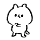
スコアはあまり変わらず…。。。

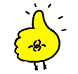
元のModelを保存します！（スコア0.8099010638119014）めでたしめでたし

In [169]:
import pickle
# 学習済みモデルの保存
with open('MPG.pkl', 'wb')as f:
    pickle.dump(model2,f)   